# Principle Component Analysis

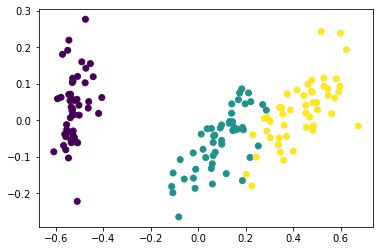

In [134]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from sklearn.decomposition import PCA

# Load Data - Iris data set
iris_data = load_iris()
data = iris_data.data
labels = iris_data.target
classes = set(labels)

# Normalize Data
data[:,0] = data[:,0]/max(data[:,0])
data[:,1] = data[:,1]/max(data[:,1])
data[:,2] = data[:,2]/max(data[:,2])
data[:,3] = data[:,3]/max(data[:,3])

# Train and fit model
pcaIris = PCA(n_components=2)
pcaDF = pd.DataFrame(pcaIris.fit_transform(data))

# Plot PCA
plt.scatter(pcaDF[0], pcaDF[1], c=labels)

# Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import data - MNIST data set
mnist = fetch_openml('mnist_784')
train_features, test_features, train_labels, test_labels = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [142]:
# Perform PCA on features
pca = PCA(.95)
pca.fit(train_features)

train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

In [146]:
# Fit logistic regression model
LDA = LogisticRegression()
LDA.fit(train_features, train_labels)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
# Predict output 
print(LDA.predict(test_features))
print("Accuracy: ",LDA.score(test_features, test_labels))

['0' '4' '1' ... '1' '3' '0']
Accuracy:  0.9155


### Tutorial followed: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60